# intro

in this notebook I change the input data from a hypersurface of all paramters i.e. q, s1, s2 and time

to instead use time as the channel dimension

In [1]:
# %matplotlib inline

In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# from cycler import cycler
# from itertools import cycle

# mpl.rcParams.update(mpl.rcParamsDefault)
plt.style.use("ggplot")
mpl.rcParams.update({"font.size": 16})

import pickle

In [3]:
from tqdm import tqdm

In [4]:
pkl_filename = "pre_processing/times_scaler.pkl"
with open(pkl_filename, 'rb') as file:
    times_scaler = pickle.load(file)

In [5]:
times_scaler

MinMaxScaler(feature_range=(-1, 1))

In [6]:
times = np.load("training_data/times.npy")

In [7]:
times_scaled = times_scaler.transform(times[:, np.newaxis])[:, 0]

In [8]:
times

array([-499.50442803, -499.00442803, -498.50442803, ...,   48.49557197,
         48.99557197,   49.49557197])

In [9]:
times_scaled

array([-1.        , -0.99817851, -0.99635701, ...,  0.99635701,
        0.99817851,  1.        ])

In [10]:
times.shape

(1099,)

In [11]:
times_scaled.shape

(1099,)

In [12]:
amps = np.load("training_data/amplitude.npy")
amp_processing_params = np.load("pre_processing/amp_preprocessing_params.npz")

# amps = np.load("training_data/phase.npy")
# amp_processing_params = np.load("pre_processing/phase_preprocessing_params.npz")

In [13]:
amps.shape

(500, 1099)

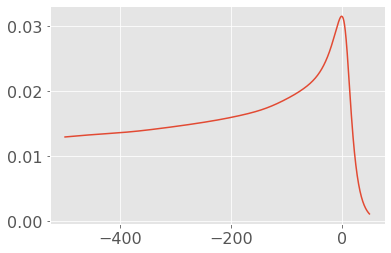

In [14]:
plt.figure()
plt.plot(times, amps[0])

In [15]:
plt.figure()
plt.plot(times_scaled, amps[0])

In [16]:
list(amp_processing_params)

['mean', 'max']

In [17]:
amp_processing_params['mean']

array([[0.01255005, 0.01255297, 0.01255593, ..., 0.00125779, 0.00120668,
        0.00115758]])

In [18]:
amp_processing_params['mean'].shape

(1, 1099)

In [19]:
amp_processing_params['max']

array(0.00714663)

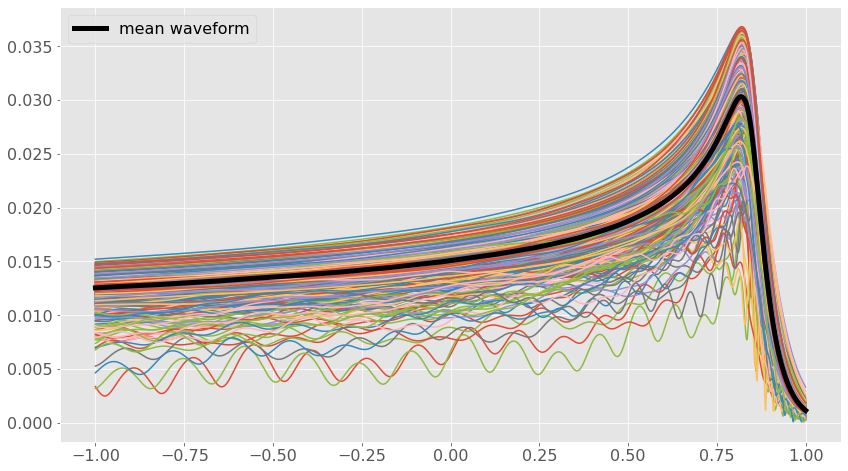

In [20]:
plt.figure(figsize=(14, 8))
for y in amps:
    plt.plot(times_scaled, y)
    
plt.plot(times_scaled, amp_processing_params['mean'][0], label='mean waveform', lw=5, c='k')
plt.legend()

In [21]:
import compute_preprocessing

In [22]:
amps_scaled = compute_preprocessing.apply_pre_process_forward(amps, amp_processing_params['mean'], amp_processing_params['max'])

In [23]:
plt.figure()
plt.plot(times_scaled, amps_scaled[0])

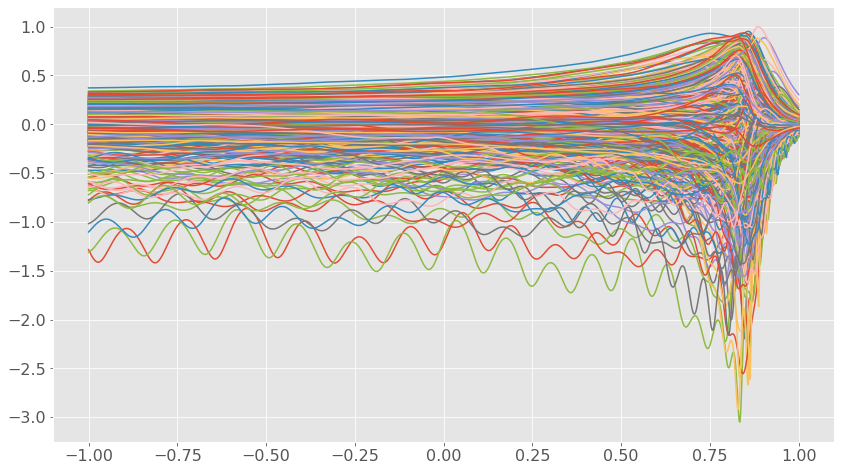

In [24]:
plt.figure(figsize=(14, 8))
for y in amps_scaled:
    plt.plot(times_scaled, y)
#     plt.plot(times, y)
# plt.xlim(-100, 100)

In [25]:
amps_scaled_reverse = compute_preprocessing.apply_pre_process_reverse(amps_scaled, amp_processing_params['mean'], amp_processing_params['max'])

In [26]:
np.testing.assert_array_almost_equal(amps, amps_scaled_reverse)

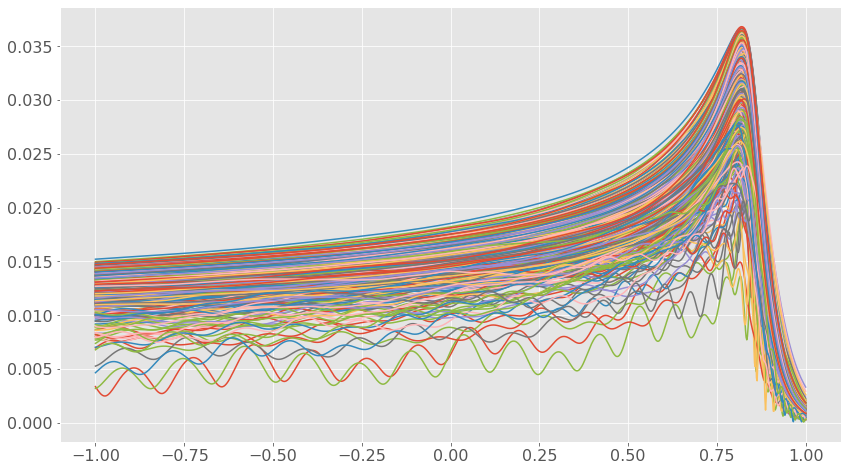

In [27]:
plt.figure(figsize=(14, 8))
for y in amps_scaled_reverse:
    plt.plot(times_scaled, y)

# setting up the domain

In [28]:
coords = np.load("training_data/coords.npy")

In [29]:
times.shape

(1099,)

In [30]:
coords.shape

(3, 500)

In [31]:
amps.shape

(500, 1099)

In [32]:
np.outer(coords, times).shape

(1500, 1099)

In [33]:
(times[:, np.newaxis]*coords[0]).shape

(1099, 500)

In [34]:
1099 * 3

3297

In [35]:
def convert_input_for_ann(times, q, chi1, theta1):
    X = []
    for _q, _chi1, _theta1 in zip(q, chi1, theta1):
        for t in times:
            X.append([t, _q, _chi1, _theta1])
    X = np.asarray(X)
    return X

In [36]:
X = convert_input_for_ann(times_scaled, coords[0], coords[1], coords[2])

In [37]:
y = amps.ravel()
print(y.shape)

# X = []


# # for b,c,d in coords.T:

# bb = coords[0]
# cc = coords[1]
# dd = coords[2]

# for b,c,d in zip(bb,cc,dd):
#     for a in times_scaled:
# #         print(a,b,c,d)
#         X.append([a,b,c,d])
# X = np.asarray(X)

(549500,)


In [38]:
# coords[0]

In [39]:
# coords[1]

In [40]:
# coords[2]*180/np.pi

In [41]:
X.shape

(549500, 4)

In [42]:
X[2]

array([-0.99635701,  2.03547937,  0.2632761 ,  1.29650135])

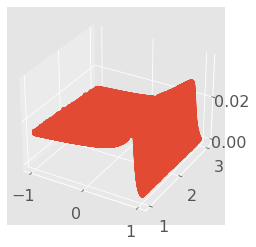

In [43]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X[:,0], X[:,1], y)

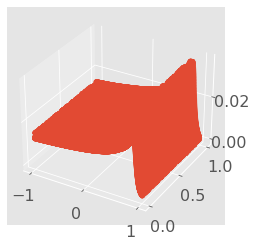

In [44]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X[:,0], X[:,2], y)

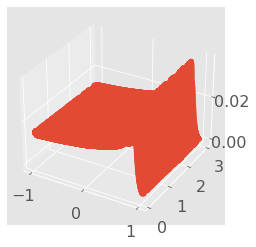

In [45]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X[:,0], X[:,3], y)

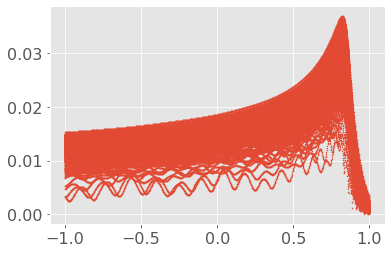

In [46]:
plt.figure()
plt.scatter(X[:,0], y, s=1)

# using time as channel

In [47]:
coords.shape

(3, 500)

In [48]:
times_scaled.shape

(1099,)

In [51]:
X.shape

(549500, 4)

In [55]:
q = coords[0]
chi = coords[1]
theta = coords[2]

In [56]:
q.shape

(500,)

In [ ]:
# target shape?
# (x, y, channel=times)

In [74]:
# lets add in the channels dimension

In [75]:
data = coords.copy()

In [76]:
data.shape

(3, 500)

In [77]:
# add channels first
# https://machinelearningmastery.com/a-gentle-introduction-to-channels-first-and-channels-last-image-formats-for-deep-learning/

In [78]:
data_first = np.expand_dims(data, axis=0)

In [79]:
data_first.shape

(1, 3, 500)

In [81]:
test=np.random.uniform(size=(100, 3, 10))

In [82]:
test.shape

(100, 3, 10)

In [85]:
test[0]

array([[0.43730366, 0.63672121, 0.03897349, 0.07977545, 0.90727863,
        0.04880899, 0.15056868, 0.23822869, 0.13818526, 0.30996028],
       [0.5708051 , 0.86857251, 0.86700001, 0.15275196, 0.90129758,
        0.62486828, 0.42565739, 0.76834499, 0.53673761, 0.54274908],
       [0.53518903, 0.13894757, 0.6774275 , 0.46532542, 0.66628377,
        0.91558789, 0.06299418, 0.61686499, 0.57568294, 0.67845479]])